In [ ]:
from typing import TypedDict # to define a dictionary with a specific structure,

In [ ]:
class PortFolioState(TypedDict):
    amount_usd:float
    total_usd: float # usd * total interest it gets
    total_inr:float # usd* current inr rate

In [4]:
def calc_total_usd(state: PortFolioState)->PortFolioState:
    state['total_usd'] = state['amount_usd']*1.08  # 8% interest per annum

    return state

def convert_inr(state: PortFolioState)->PortFolioState:
    state['total_inr'] = state['total_usd']*85  # 8% interest per annum

    return state

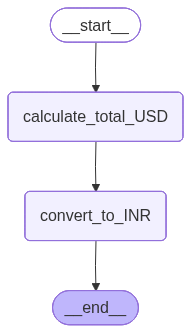

In [5]:
from langgraph.graph import StateGraph, START, END


builder = StateGraph(PortFolioState)

builder.add_node("calculate_total_USD", calc_total_usd)
builder.add_node("convert_to_INR", convert_inr)

builder.add_edge(START, "calculate_total_USD")
builder.add_edge("calculate_total_USD", "convert_to_INR")
builder.add_edge("convert_to_INR", END)
builder.compile()

In [6]:
graph = builder.compile()


graph.invoke({
    'amount_usd':1000
})


{'amount_usd': 1000, 'total_usd': 1080.0, 'total_inr': 91800.0}